In [29]:
import pandas as pd
import numpy as np
import numpy as np
import torch

xcx 



Testing the ratio of the test data

In [30]:
#loading the benchmark dataset -- training data
y = np.load("/home/sxr280/DeepRBPLoc/testdata/Test_fold0_y.npy")
test_num = y.shape[0]
np.sum(y, axis=0)/test_num

array([0.68902966, 0.99193781, 0.13532969, 0.55773107, 0.30175641,
       0.18715808, 0.11488627])

Loading all the data in one line

In [31]:
all_data = pd.read_table("./All_RNA_subcellular_localization_data.txt", sep = "\t")



/tmp/ipykernel_2454747/93554179.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  all_data = pd.read_table("./All_RNA_subcellular_localization_data.txt", sep = "\t")


To see how many data we have in total for Human

In [32]:
#data glance
ranked_locs = all_data[all_data["Species"] == "Homo sapiens"]["SubCellular_Localization"].value_counts(ascending=False).index
print("The human dataset are shown as below:")
for loc in ranked_locs:
    human_data = all_data[all_data["Species"] == "Homo sapiens"]
    RNAs = dict(human_data[human_data["SubCellular_Localization"] == loc]["RNA_category"].value_counts(ascending=False))
    number = human_data[human_data["SubCellular_Localization"] == loc].shape[0]
    
    print("%s: %s, they come from %s" % (loc, number, RNAs))


The human dataset are shown as below:
Exosome: 110142, they come from {'circRNA': 58334, 'mRNA': 17935, 'piRNA': 10438, 'rRNA': 6565, 'lncRNA': 6411, 'miRNA': 6150, 'snRNA': 1773, 'Y RNA': 1168, 'snoRNA': 820, 'tRNA': 519, 'pseudo': 21, 'ncRNA': 5, 'scRNA': 2, 'lincRNA': 1}
Microvesicle: 24921, they come from {'piRNA': 10400, 'rRNA': 6544, 'miRNA': 3886, 'snRNA': 1752, 'Y RNA': 1168, 'snoRNA': 738, 'tRNA': 432, 'pseudo': 1}
Nucleus: 14414, they come from {'mRNA': 11627, 'miRNA': 1056, 'lncRNA': 858, 'circRNA': 279, 'snoRNA': 248, 'pseudo': 164, 'snRNA': 48, 'tRNA': 47, 'ncRNA': 33, 'mtRNA': 30, 'lincRNA': 7, 'rRNA': 5, 'scaRNA': 4, 'Y RNA': 4, 'vRNA': 3, 'unclassified RNA': 1}
Cytosol: 12133, they come from {'mRNA': 11324, 'circRNA': 421, 'lncRNA': 282, 'pseudo': 47, 'ncRNA': 37, 'lincRNA': 7, 'snoRNA': 7, 'miRNA': 4, 'other': 3, 'rRNA': 1}
Chromatin: 8027, they come from {'mRNA': 7562, 'lncRNA': 416, 'circRNA': 46, 'ncRNA': 2, 'miRNA': 1}
Nucleoplasm: 7970, they come from {'mRNA': 748

how many data we have for Mouse

In [33]:
#data glance
ranked_locs = all_data[all_data["Species"] == "Mus musculus"]["SubCellular_Localization"].value_counts(ascending=False).index
print("The mouse dataset has been shown as below")
for loc in ranked_locs:
    mouse_data = all_data[all_data["Species"] == "Mus musculus"]
    RNAs = dict(mouse_data[mouse_data["SubCellular_Localization"] == loc]["RNA_category"].value_counts(ascending=False))
    number = mouse_data[mouse_data["SubCellular_Localization"] == loc].shape[0]
    print("%s: %s, they come from %s" % (loc, number, RNAs))


The mouse dataset has been shown as below
Nucleus: 2660, they come from {'mRNA': 2380, 'lncRNA': 147, 'miRNA': 109, 'pseudo': 5, 'ncRNA': 4, 'snoRNA': 4, 'snRNA': 4, 'circRNA': 2, 'lincRNA': 1, 'rRNA': 1, 'DNA segment': 1, 'QTL': 1, 'unclassified RNA': 1}
Exosome: 2014, they come from {'mRNA': 1092, 'miRNA': 840, 'lncRNA': 53, 'DNA segment': 20, 'pseudo': 6, 'unclassified RNA': 2, 'ncRNA': 1}
Cytoplasm: 1688, they come from {'mRNA': 1582, 'lncRNA': 70, 'miRNA': 9, 'circRNA': 7, 'ncRNA': 5, 'pseudo': 5, 'piRNA': 4, 'rRNA': 3, 'lincRNA': 1, 'snRNA': 1, 'unknown': 1}
Mitochondrion: 183, they come from {'miRNA': 179, 'mRNA': 2, 'lncRNA': 1, 'rRNA': 1}
Axon: 154, they come from {'mRNA': 107, 'miRNA': 35, 'lncRNA': 7, 'rRNA': 4, 'snRNA': 1}
Cell body: 80, they come from {'lncRNA': 33, 'mRNA': 28, 'miRNA': 16, 'ncRNA': 1, 'pseudo': 1, 'unclassified RNA': 1}
Dendrite: 60, they come from {'mRNA': 55, 'miRNA': 4, 'ncRNA': 1}
Synaptoneurosome: 50, they come from {'miRNA': 49, 'lncRNA': 1}
Extrace

Extract the lncRNA data set from human set
- the finalized fasta file must be like >1100000,ACCNUM:NM_001672,Gene_ID:434,Gene_Name:ASIP
- filter the independent dataset

In [35]:
def get_tag(label):
    if label in ["Nucleus", "Chromatin" , "Nucleoplasm", "Nucleolus", "Nuclear"]:
        label = "Nucleus"
    labels = np.array(["Nucleus","Exosome","Cytosol","Cytoplasm","Ribosome","Membrane","Endoplasmic reticulum"])
    locs = np.zeros(7)
    y = np.array(labels == label, dtype = "int")  
    # y_str = ''.join([str(i) for i in y])
    return list(y)


In [36]:
human_lnc = human_data[human_data["SubCellular_Localization"].isin(["Nucleus", "Chromatin" , "Nucleoplasm", "Nucleolus", "Nuclear","Exosome","Cytosol","Cytoplasm","Ribosome"]) & human_data["RNA_category"].isin(["lncRNA","lincRNA"])]
print("Counting the localization in the lncRNA:", human_lnc["SubCellular_Localization"].value_counts())

geneid_loc = {}
name_loc = {}
geneid_name = {}
all_c = 0
nan_c = 0
id_c = 0
id_symbol = {}
# name_id = {}
# name_symbol = {}
for i in range(human_lnc.shape[0]):
    gene_name = list(human_lnc["Gene_Name"])[i]
    id_full = list(human_lnc["Gene_ID"])[i]
    loc = list(human_lnc["SubCellular_Localization"])[i]
    try:
        gene_id = id_full.split(":")[1]
        id_c+=1
        gene_symbol = list(human_lnc["Gene_symbol"])[i]
        id_symbol[gene_id] = gene_symbol
        geneid_loc.setdefault(gene_id,[]).append(get_tag(loc))
        geneid_name.setdefault(gene_id,[]).append(gene_name)# add to info later
    except:
        all_c+=1
        if str(id_full) == "nan":
            nan_c+=1
        # print(gene_name)
        name_loc[gene_name] =  loc
     
print("Number of id to loc:", id_c)
print("Number of non redundant id to loc:", len(list(geneid_loc.keys())))
print("Number of nan to loc:", nan_c)
print("Number of weired to loc:", all_c)
print("Number of non redundant weired to loc:", len(list(name_loc.keys())))

    



Counting the localization in the lncRNA: SubCellular_Localization
Exosome        6412
Nucleus         865
Nucleoplasm     437
Chromatin       416
Nucleolus       295
Cytosol         289
Cytoplasm       231
Ribosome         24
Nuclear           7
Name: count, dtype: int64
Number of id to loc: 8837
Number of non redundant id to loc: 6554
Number of nan to loc: 139
Number of weired to loc: 139
Number of non redundant weired to loc: 110


Getting the main gene name based on alias names
- From gene id to main name in order to get lncRNA sequence
- Weired lncRNAs need to be filtered

In [39]:
gene_info = pd.read_table("Homo_sapiens.gene_info", index_col=0)
symbol2id = {}
id2name = {}
name2id = {}
# gene_info["GeneID"][:10]
name_failed = 0 

for geneid in geneid_loc.keys():
    # name = gene_info[gene_info["GeneID"].isin([int(geneid)])]["Symbol"]
    # id2name[geneid] = name.values
    # name2id[name] = geneid
    try:
        name = gene_info[gene_info["GeneID"].isin([int(geneid)])]["Symbol"]
        id2name[geneid] = name.values[0]
        name2id[name.values[0]] = geneid
    except:
        # print(geneid, "cannot get the gene name!!!")
        print(geneid)
        # id_symbol
        # id2name[geneid] = id_symbol[geneid]
        name_failed += 1

print(name_failed, "genes cannot get the gene name!!!")
print(len(list(geneid_loc.keys())), "genes are successful to fetch the gene names")


URS00000596CE_9606|URS0000E60B12_9606
URS00001710A5_9606
URS00001D7589_9606
URS00002658F8_9606
URS00003F999A_9606
URS0000432E9E_9606
URS00004F6E74_9606
URS000056E99A_9606
URS000075A607_9606
URS000075AA5E_9606
URS000075ABDA_9606
URS000075ACB7_9606
URS000075B2F4_9606
URS000075C35D_9606
URS000075C45D_9606
URS000075C5A5_9606
URS000075C5BA_9606
URS000075CADA_9606
URS000075CE23_9606
URS000075D3C8_9606
URS000075DDC2_9606
URS000075DFD6_9606
URS000075E104_9606
URS000075E59E_9606
URS000075EB39_9606
URS000075EC28_9606
URS000075EDB6_9606
URS00008B6411_9606|URS00008BC2D0_9606
URS00008B7A48_9606|URS00008B5992_9606|URS00008B6A29_9606
URS00008BA37E_9606|URS00008C0861_9606
URS00008BC0BF_9606|URS00008B7107_9606
URS00008BC580_9606|URS00008B2192_9606
URS00008BD329_9606|URS00008BB712_9606|URS00008B9C9E_9606
URS00008C0E8D_9606|URS00008C1423_9606|URS00008BA8BA_9606|URS00008BB95B_9606
URS00008C1D94_9606
URS00009BABFB_9606|URS0000D5DA87_9606|URS00009C4760_9606|URS00009BD6CA_9606|URS0000D5C4AD_9606|URS0000D5E3E

Adding the multitag to each lncRNA

In [40]:
tags = ""
id_tags = {}
for geneid in list(geneid_loc.keys()):
    loc_ary = np.array(geneid_loc[geneid])
    multi_loc = loc_ary.sum(axis=0)
    multi_loc = np.array(multi_loc, dtype = "bool")
    multi_loc = np.array(multi_loc, dtype = "int")
    multi_loc = np.array(multi_loc, dtype = "str")
    multi_loc_tag = "".join(list(multi_loc))
    gene_names = "|".join(list(set(geneid_name[geneid])))
    tags += ">" + multi_loc_tag + "," + "Gene_ID:" + str(geneid) + "," + "Gene_Name:" + gene_names + "\n"
    tag = ">" + multi_loc_tag + "," + "Gene_ID:" + str(geneid) + "," + "Gene_Name:" + gene_names + "\n"
    id_tags[geneid] = tag.strip()
with open("./lncRNA_all_data_id.txt", "w") as f1:
    f1.write(tags)
    

In order to match the sequence with the independent lncRNA dataset, we need to get access to gff file to get the gene sequences and gene intervals.
- Get the sequence by RNALocatev2 first.
- Try to get access via file match (NCBI)
- For those unable to be done on NCBI can be retrived from ensemble ncRNA database

In [86]:
lnc_seq = pd.read_table("./All RNA sequence/human_RNA_sequence.txt")
# lnc_str = ""
got_id = {}
# non_got_id = []
name_seq = {}
name_info = {}
for i in range(lnc_seq.shape[0]):
    gene_id = lnc_seq["Gene_ID"][i].split(":")[1]
    seq = lnc_seq["Sequence"][i]
    if gene_id in list(id_tags.keys()):
        # got_id[gene_id] = seq
        gene_name = id2name[gene_id]
        if gene_name == "MROCKI":
            print(gene_name)
            print(gene_id)
            this_id = gene_id
            print(id_tags[gene_id])
        # print(gene_id)
        # print(gene_name)
        name_seq.setdefault(gene_name,[]).append(seq)
        name_info.setdefault(gene_name,[]).append(id_tags[gene_id]+"\n")
        # lnc_str += id_tags[gene_id] + "\n" + seq + "\n"
print(id_tags["285758"])

print(id_tags[this_id])






MROCKI
285758
>0100000,Gene_ID:285758,Gene_Name:LINC01268
>0100000,Gene_ID:285758,Gene_Name:LINC01268
>0100000,Gene_ID:285758,Gene_Name:LINC01268


In [ ]:
name_seq = {}
name_info = {}
map_c = 0
import mmap
with open("GRCh38_latest_rna.fna", "r") as f1:
    with mmap.mmap(f1.fileno(), 0, access=mmap.ACCESS_READ) as m:
        gene_name = ''
        for line in list(iter(m.readline, b''))[:100]:
            line = line.decode("utf-8")
            if line.startswith(">") == True:

                if gene_name != '':
                    if gene_name in list(id2name.values()):
                        name_seq.setdefault(gene_name,[]).append(seq)
                        geneid = name2id[gene_name]
                        name_info.setdefault(gene_name,[]).append(id_tags[geneid]+",%s\n" % refinfo)
                        map_c += 1
                refinfo = line.split("\n")[0][1:]
                # gene_name = line.split("(")[1].split(")")[0]
                gene_name = line.split(",")[0].split("(")[-1].split(")")[0]
                print(gene_name)
                seq = ""
            else:
                seq += line.strip()
print(map_c, "genes are mapped to fna file")
print(len(list(name_seq.keys())) ,"genes are mapped to fna file")
            

       

In [ ]:

map_c = 0
import mmap
with open("Homo_sapiens.GRCh38.ncrna.fa", "r") as f2:
    with mmap.mmap(f2.fileno(), 0, access=mmap.ACCESS_READ) as m:
        gene_name = ''
        for line in list(iter(m.readline, b''))[:1000]:
            line = line.decode("utf-8")
            if line.startswith(">") == True:

                if gene_name != '':
                    if gene_name in list(id2name.values()):
                        name_seq.setdefault(gene_name,[]).append(seq)
                        geneid = name2id[gene_name]
                        name_info.setdefault(gene_name,[]).append(id_tags[geneid]+",%s\n" % refinfo)
                        map_c += 1
                refinfo = line.split("\n")[0][1:]
                # gene_name = line.split("(")[1].split(")")[0]
                gene_name = line.split("gene_symbol:")[1].split(" ")[0]
                print(gene_name)
                seq = ""
            elif line.startswith("[") == True:
                continue
            else:
                seq += line.strip()
print(map_c, "genes are mapped to fna file")
print(len(list(name_seq.keys())) ,"genes are mapped to fna file")

In [ ]:
items = ""
for gene in name_seq.keys():
    seq = name_seq[gene]
    longest_seq = max(seq, key=len)
    idx = seq.index(longest_seq)
    info = name_info[gene]
    longest_info = info[idx]
    items += longest_info+longest_seq+"\n"
    

with open("./lncRNA_all_data_seq.txt", "w") as f1:
    f1.write(items)
    

In [55]:
name2id["KIAA0125"]

KeyError: 'KIAA0125'

Preprocessing the miRNA database


In [42]:
with open("miRNA.dat", "r") as f1:
    cache = ""
    line_c = 0
    seq = ""
    for line in f1.readlines():
        if line_c == 1:

            for i in line:
                if i in ["a","u","c","g","t"]:
                    i = i.upper()
                    if i == "U":
                        i = "T"
                    seq += i
            
            if line.startswith("//") == True:
                # print("ok2")
                # print(seq)
                cache = cache[:-1] #remove the ","
                cache += "\n" + seq + "\n"
                seq = ""
                line_c = 0

        # print(line)
        if "/accession=" in line:
            acc = line.split("/accession=")[1].strip().replace("\"","")
            if cache == "" or cache[-1] == "\n":
                cache += ">" + acc + ","
            elif cache[-1] == ",": 
                cache += acc + ","
            # cache += acc + ","
        if "/product=" in line:
            pro = line.split("/product=")[1].strip().replace("\"","")
            cache += pro + ","
            # cache += pro + "\n"
        if "Sequence " in line:
            # print("ok")
            line_c = 1
            
           
        

# print(cache)
        


In [43]:
with open("miRNA_ref.fasta","w") as f1:
    f1.write(cache)

In [4]:
"".join([i if i in ["a","u","c","g","t"] else "" for i in "aadt"])


'aat'

Do the statistic of the the new generated lncRNA file

In [2]:
import numpy as np
import rpy2
import pandas as pd
colnames = ["Gene_ID","Gene_Name", "mRNA_type","seq_length", "Nucleus","Exosome","Cytosol","Cytoplasm","Ribosome","Membrane","Endoplasmic reticulum"]

def get_data(RNAspcies = "lncRNA", fasta = "lncRNA_all_data_seq.fasta"):
    unique_c = 0
    multi_c = 0
    comb = {}
    types = []
    i=0
    tag_seq = {}
    tag_dict = {}
    tag_lst = []
    with open(fasta) as f1:
        tag_str = ""
        for line in f1.readlines():
            i+=1
            if line.startswith(">") == True:
                if tag_str != "" :
                    tag_seq[tag_str] = len(seq)

                    tag_lst.append([geneid]+[name]+[RNAspcies]+[len(seq)]+list(tag_str))

                tag_str = line[1:].split(",")[0]
                tag = np.array(list(line[1:].split(",")[0]), dtype = "int")
                geneid = line.split(",")[1].split(":")[1]
                name = line.split(",")[2].split(":")[1]
                loc_num = tag.sum()

                # print(comb.keys())
                if tag in types:
                    comb[tag_str]+=1
                else:
                    comb[tag_str]=1
                types.append(tag_str)
                if loc_num >= 2:
                    multi_c += 1
                elif loc_num == 1:
                    unique_c += 1
                

                
                seq = ""
            else:
                seq+=line.strip()
    types_uni = set(types)

    print("There are %s types of combination" % len(list(types_uni)))
    print("The total number of lncRNA data:", multi_c+unique_c)
    print("The number of multilabel lncRNA data:", multi_c)
    print("The number of unique lncRNA data:", unique_c)

    return tag_lst

In [3]:
tag_lst = get_data(RNAspcies = "lncRNA", fasta = "lncRNA_all_data_seq.fasta")
df = pd.DataFrame(np.array(tag_lst), columns=colnames)

/tmp/ipykernel_2497660/1950706340.py:31: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if tag in types:


There are 21 types of combination
The total number of lncRNA data: 3586
The number of multilabel lncRNA data: 929
The number of unique lncRNA data: 2657


NameError: name 'colnames' is not defined

In [17]:
for i in colnames[3:]:
    df[i] = df[i].astype(float)
df

,Gene_ID,Gene_Name,mRNA_type,seq_length,Nucleus,Exosome,Cytosol,Cytoplasm,Ribosome,Membrane,Endoplasmic reticulum
0,9834,KIAA0125\n,lncRNA,2764.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,100128640,ACVR2B-AS1,lncRNA,3169.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,101929484,LINC01615,lncRNA,1633.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,100874363,HOXC-AS1,lncRNA,3228.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
4,643862,SPDYE10P,lncRNA,3615.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
3606,101101692,HELLPAR,lncRNA,205012.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
3607,106144528,DENND6A-AS1,lncRNA,364.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3608,120766143,RP11-843B15.2,lncRNA,61316.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3609,100874272,KLF7-IT1,lncRNA,655.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [19]:
df.iloc[:,-7:].sum(axis=0)


Nucleus                   727.0
Exosome                  3516.0
Cytosol                   214.0
Cytoplasm                 105.0
Ribosome                    8.0
Membrane                    0.0
Endoplasmic reticulum       0.0
dtype: float64

Building the dataframe for visualization

In [20]:
genres = list(colnames[4:])
df[genres] = df[genres] == 1
df[genres].head(3).T

,0,1,2
Nucleus,False,False,False
Exosome,True,True,True
Cytosol,False,False,False
Cytoplasm,False,False,False
Ribosome,False,False,False
Membrane,False,False,False
Endoplasmic reticulum,False,False,False


In [22]:
%R -i df -i genres

In [23]:
%%R
library(ggplot2)
library(ComplexUpset)

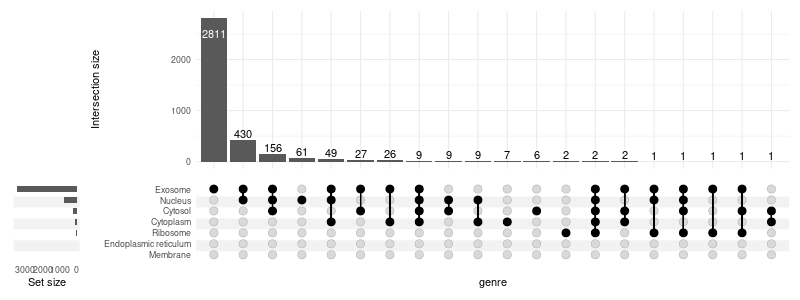

In [24]:
%%R -w 800 -h 300
upset(df, genres, name='genre', width_ratio=0.1)

Plotting the data